In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
train_images[0].shape

(28, 28)

In [32]:
28*28

784

In [33]:
train_labels[567]

np.uint8(7)

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])

In [35]:
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [36]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [37]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8746 - loss: 0.4369
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9662 - loss: 0.1157
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9786 - loss: 0.0713
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9864 - loss: 0.0476
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9894 - loss: 0.0369


In [38]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[7.60750041e-09, 3.72920805e-10, 7.70524707e-07, 1.94095082e-06,
        2.77614477e-12, 1.85220230e-08, 4.41421530e-14, 9.99996841e-01,
        1.78630142e-08, 3.93616062e-07],
       [9.01038799e-09, 3.66084259e-06, 9.99991715e-01, 2.05913580e-06,
        5.36944946e-13, 1.01654578e-07, 2.50695855e-08, 1.51645168e-12,
        2.38383063e-06, 7.72289540e-14],
       [2.95880341e-07, 9.96755242e-01, 2.00769849e-04, 1.28007559e-05,
        1.04782412e-04, 4.12856571e-05, 7.14073349e-06, 2.29378138e-03,
        5.83101064e-04, 9.15499413e-07],
       [9.99803543e-01, 5.13735676e-09, 1.04447972e-04, 3.96430664e-07,
        2.70802076e-07, 1.59210072e-06, 4.79413393e-06, 6.80386802e-05,
        3.45185991e-10, 1.69727737e-05],
       [8.75596379e-06, 4.95319508e-10, 9.74922114e-06, 1.02753440e-07,
        9.80577171e-01, 7.31493941e-08, 4.93956259e-06, 2.11712555e-04,
        1.05594370e-06, 1.91864129e-02],
       [7.98956989e-09, 9.94242370e-01, 2.95291352e-06, 8.74371779e-07,
   

In [39]:
for pred in predictions:
  print(pred.argmax())

7
2
1
0
4
1
4
9
5
9


In [40]:
test_labels[0]

np.uint8(7)

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
import os

In [17]:
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
    print("Google Drive mounted.")
else:
    print("Google Drive already mounted.")

Google Drive already mounted.


In [18]:
image_file_path = '/content/drive/MyDrive/Colab Notebooks/three.png'

In [19]:
try:
    img = Image.open(image_file_path)
    print(f"Image '{image_file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: Image file '{image_file_path}' not found.")

Image '/content/drive/MyDrive/Colab Notebooks/three.png' loaded successfully.


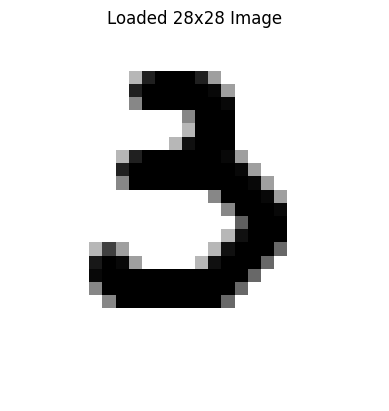

In [20]:
plt.imshow(img, cmap='gray')
plt.title("Loaded 28x28 Image")
plt.axis('off')
plt.show()

In [21]:
if img.mode != 'L':
    img = img.convert('L')
    print("Image converted to grayscale.")
else:
  print("Image is already in grayscale.")


Image converted to grayscale.


In [22]:
img_array = np.array(img)
print(f"Image converted to NumPy array. Shape: {img_array.shape}")
print(f"Original pixel range: {img_array.min()} to {img_array.max()}")

Image converted to NumPy array. Shape: (28, 28)
Original pixel range: 0 to 255


In [23]:
img_array_inverted = 255 - img_array
print(f"Colors inverted. New pixel range: {img_array_inverted.min()} to {img_array_inverted.max()}")

Colors inverted. New pixel range: 0 to 255


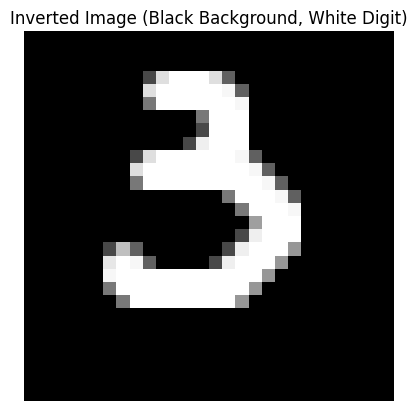

In [24]:
plt.imshow(img_array_inverted, cmap='gray')
plt.title("Inverted Image (Black Background, White Digit)")
plt.axis('off')
plt.show()

In [25]:
img_flat = img_array_inverted.flatten()
print(f"Image flattened to 1D array. Shape: {img_flat.shape}")

Image flattened to 1D array. Shape: (784,)


In [26]:
img_flat_normalized = img_flat / 255.0
print(f"Pixel values normalized to range: {img_flat_normalized.min()} to {img_flat_normalized.max()}")


Pixel values normalized to range: 0.0 to 1.0


In [27]:
print("\n--- Prepared Image Array for Neural Network ---")
print("First 10 pixels (normalized):", img_flat_normalized[:10])
print("Last 10 pixels (normalized):", img_flat_normalized[-10:])
print(f"Final array shape for testing: {img_flat_normalized.shape}")


--- Prepared Image Array for Neural Network ---
First 10 pixels (normalized): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Last 10 pixels (normalized): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Final array shape for testing: (784,)


In [28]:
img_for_prediction = img_flat_normalized.reshape(1, 784)
print(f"Reshaped for model input (batch of 1): {img_for_prediction.shape}")

Reshaped for model input (batch of 1): (1, 784)


In [43]:
image_for_prediction1 = img_for_prediction[0:10]
predictions = model.predict(image_for_prediction1)
predicted_class = np.argmax(predictions)

print(f"\nModel predicted: {predicted_class}")
print(f"Prediction probabilities: {predictions}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Model predicted: 3
Prediction probabilities: [[7.8240555e-06 3.4153314e-07 4.5443638e-03 9.9034321e-01 5.7869255e-07
  3.5476054e-03 7.8061385e-06 8.0919839e-05 1.0510054e-06 1.4663232e-03]]


In [46]:
for pre in predictions:
  print(pre.argmax())

3


In [48]:
predictions = np.array([[7.8240555e-06, 3.4153314e-07, 4.5443638e-03, 9.9034321e-01, 5.7869255e-07,
  3.5476054e-03, 7.8061385e-06, 8.0919839e-05, 1.0510054e-06, 1.4663232e-03]])


probabilities = predictions.flatten()

predictions_with_digits = []
for i, prob in enumerate(probabilities):
    predictions_with_digits.append((prob, i))

predictions_with_digits.sort(key=lambda x: x[0], reverse=True)

print("Prediction probabilities sorted by score:")
for prob, digit in predictions_with_digits:
    print(f"Digit {digit}: {prob:.6f}")

predicted_class = np.argmax(probabilities)
print(f"\nModel's final prediction: {predicted_class}")

Prediction probabilities sorted by score:
Digit 3: 0.990343
Digit 2: 0.004544
Digit 5: 0.003548
Digit 9: 0.001466
Digit 7: 0.000081
Digit 0: 0.000008
Digit 6: 0.000008
Digit 8: 0.000001
Digit 4: 0.000001
Digit 1: 0.000000

Model's final prediction: 3
